# Harris corner detector 

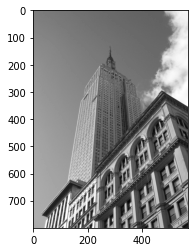

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('empire.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, 'gray')

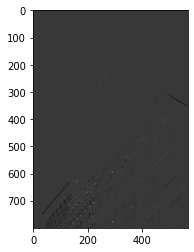

In [2]:
local_region_size = 3
kernel_size = 3
k = 0.04
threshold = 1000000.0

img_gray = np.float32(img_gray)
Harris_res_img = cv.cornerHarris(img_gray, local_region_size, kernel_size, k)
plt.imshow(Harris_res_img, 'gray')


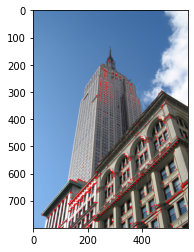

In [3]:
highlighed_colour = [0,0,255]
highlighted_img = img.copy()
highlighted_img[Harris_res_img>threshold] = highlighed_colour
plt.imshow(highlighted_img[:,:,::-1])

In [4]:
thresholds = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
for threshold in thresholds:
    num_of_corners = 0
    for i in range(0, len(Harris_res_img)):
        for j in range(0, len(Harris_res_img[0])):
            if Harris_res_img[i,j]>threshold:
                num_of_corners+=1
    print("For the threshold ",threshold, ": ",num_of_corners, " corners detected!")

For the threshold  1.0 :  148484  corners detected!
For the threshold  10.0 :  119960  corners detected!
For the threshold  100.0 :  104083  corners detected!
For the threshold  1000.0 :  87282  corners detected!
For the threshold  10000.0 :  66129  corners detected!
For the threshold  100000.0 :  38451  corners detected!
For the threshold  1000000.0 :  10346  corners detected!
For the threshold  10000000.0 :  823  corners detected!
For the threshold  100000000.0 :  0  corners detected!


The higher the threshold, the fewer corners are detected.

# SIFT

In [5]:
sift = cv.SIFT_create()

Number of detected keypoints: 2804


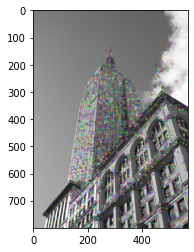

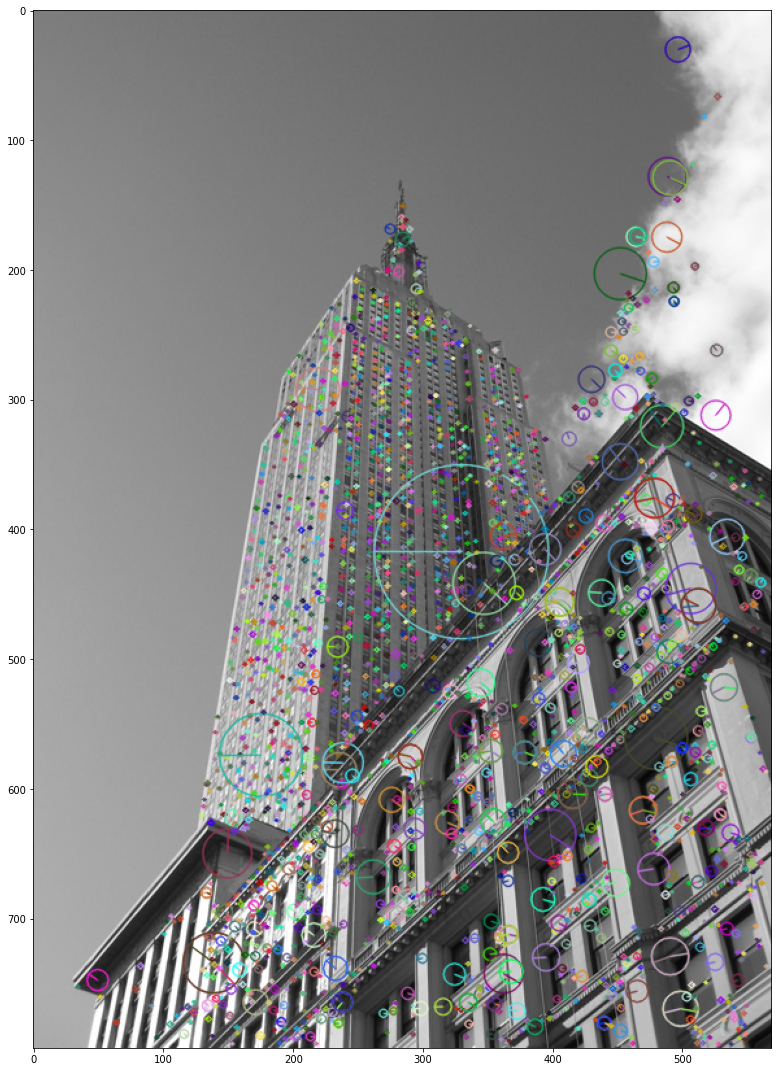

In [6]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
kp = sift.detect(img_gray, None)
img_gray_kp = img_gray.copy()
img_gray_kp = cv.drawKeypoints(img_gray, kp, img_gray_kp)
plt.imshow(img_gray_kp)
print("Number of detected keypoints: %d" % (len(kp)))
img_gray_kp = cv.drawKeypoints(img_gray, kp, img_gray_kp, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (30,15))
plt.imshow(img_gray_kp, interpolation='nearest')
plt.tight_layout()
plt.imshow(img_gray_kp)

In [7]:
kp, des = sift.compute(img_gray, kp)
print(des.shape)

(2804, 128)


# Investigate how SIFT is robust under rotation and scaling factors

In [8]:
img_45 = cv.imread('empire_45.jpg')
img_zoomedout = cv.imread('empire_zoomedout.jpg')
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY)
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY)
img_another = cv.imread('fisherman.jpg')
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY)

In [9]:
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None)
kp_another, des_another = sift.detectAndCompute(img_another, None)
print("The number of keypoints in img_gray is %d" %(len(des)))
print("The number of keypoints in img_45_gray is %d" % (len(des_45)))


The number of keypoints in img_gray is 2804
The number of keypoints in img_45_gray is 3290


In [25]:
from scipy.spatial.distance import directed_hausdorff
d_45, index_1, index_2 = directed_hausdorff(des, des_45)
print("The Hausdorff distance between des and des_45 is ", d_45)

d_zoomedout, index_1, index_2 = directed_hausdorff(des, des_zoomedout)
print("The Hausdorff distance between des and des_zoomedout is ", d_zoomedout)

d_another, index_1, index_2 = directed_hausdorff(des, des_another)
print("The Hausdorff distance between des and des_another is ", d_another)



The Hausdorff distance between des and des_45 is  399.7674323903837
The Hausdorff distance between des and des_zoomedout is  401.33651715237676
The Hausdorff distance between des and des_another is  433.89630097524457


As expected the Hausdorff distance between des and des_another is the greatest because the descriptors correspond to completely different images.
The Hausdorff distance between des and des_45 is slightly smaller than the Hausdorff distance between des and des_zoomeout. I did not expect this. However, it makes sense because some features can probably not be detected anymore when zooming out.